In [1]:
#loading all the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

E:\python\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
dcr=pd.read_csv("coviddata.csv",index_col="Province_State")

In [3]:
dcr.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
Province_State,,,,,,,,,,,,,,,,,
Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [4]:
dcr.isnull().sum()

Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [5]:
dcr.dtypes

Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [6]:
#Removing null values in each column
for col in dcr.columns:
    if dcr[col].dtype==object:
        dcr[col].fillna(dcr[col].mode().values[0],inplace=True)
    else :
         dcr[col].fillna(0,inplace=True)

In [7]:
dcr.isnull().sum()

Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [8]:
dcr['UID'].shape

(58,)

In [9]:
dcr.shape 


(58, 17)

In [10]:
dcr.drop('UID',axis=1,inplace=True)

In [11]:
dcr['Country_Region'].unique()

array(['US'], dtype=object)

In [12]:
dcr.drop('Country_Region',axis=1,inplace=True)

In [13]:
dcr['Last_Update'].unique()

array(['2020-05-21 02:32:54'], dtype=object)

In [14]:
dcr.drop('Last_Update',axis=1,inplace=True)

In [15]:
dcr.drop('Lat',axis=1,inplace=True)

In [16]:
dcr.drop('Long_',axis=1,inplace=True)

In [17]:
dcr.head()

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
Province_State,,,,,,,,,,,,
Alabama,13052,522,0.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,USA,3353.942386,11.438860
Alaska,401,10,352.0,39.0,2,54.815493,37045.0,0.0,2.493766,USA,5063.940017,0.000000
American Samoa,0,0,0.0,0.0,60,0.000000,124.0,0.0,0.000000,ASM,222.857246,0.000000
Arizona,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,USA,2272.859351,12.022005
Arkansas,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,USA,3189.670370,10.693584


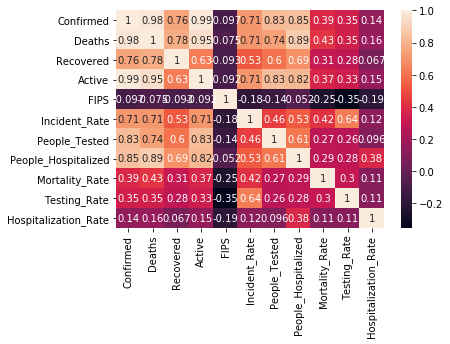

In [18]:
sns.heatmap(dcr.corr(),annot=True)

Confirmed                  AxesSubplot(0.125,0.772143;0.0945122x0.107857)
Deaths                  AxesSubplot(0.238415,0.772143;0.0945122x0.107857)
Recovered               AxesSubplot(0.351829,0.772143;0.0945122x0.107857)
Active                  AxesSubplot(0.465244,0.772143;0.0945122x0.107857)
FIPS                    AxesSubplot(0.578659,0.772143;0.0945122x0.107857)
Incident_Rate           AxesSubplot(0.692073,0.772143;0.0945122x0.107857)
People_Tested           AxesSubplot(0.805488,0.772143;0.0945122x0.107857)
People_Hospitalized        AxesSubplot(0.125,0.642714;0.0945122x0.107857)
Mortality_Rate          AxesSubplot(0.238415,0.642714;0.0945122x0.107857)
Testing_Rate            AxesSubplot(0.351829,0.642714;0.0945122x0.107857)
Hospitalization_Rate    AxesSubplot(0.465244,0.642714;0.0945122x0.107857)
dtype: object

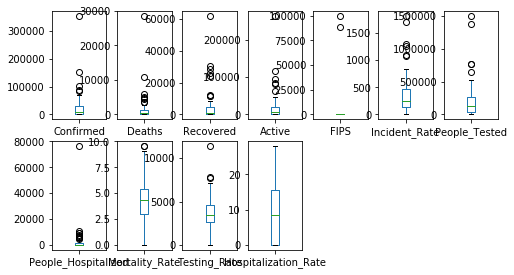

In [19]:
dcr.plot(kind="box",subplots=True,figsize=(8,14),layout=(6,7))

In [20]:
le=LabelEncoder()
for col in dcr.columns:
    if dcr[col].dtype==object:
        dcr[col]=le.fit_transform(dcr[col])

In [21]:
z=np.abs(zscore(dcr))
dcr_new=dcr[(z<3).all(axis=1)]

In [22]:
dcr_new.shape

(50, 12)

In [23]:
dcr_new.skew()

Confirmed               1.907220
Deaths                  2.083006
Recovered               2.676530
Active                  2.461362
FIPS                    0.428779
Incident_Rate           1.615604
People_Tested           1.794226
People_Hospitalized     1.957835
Mortality_Rate          0.629389
ISO3                   -3.688563
Testing_Rate            0.705405
Hospitalization_Rate    0.274608
dtype: float64

In [24]:
dcr1=dcr_new

In [25]:
y=pd.DataFrame()
y['Deaths']=dcr_new['Deaths']

In [26]:
dcr_new.drop('Deaths',axis=1,inplace=True)

In [27]:
sc=StandardScaler()
x=sc.fit_transform(dcr_new)
x

array([[-2.62440976e-01, -6.00199739e-01, -6.16674630e-02,
        -1.64369051e+00, -2.67235287e-01, -9.74603648e-02,
        -6.63108776e-02, -2.40420493e-01,  1.16247639e-01,
        -2.44886109e-01,  3.31860313e-01],
       [-8.26231660e-01, -5.49248506e-01, -6.70966699e-01,
        -1.58983433e+00, -1.01287086e+00, -8.01074830e-01,
        -6.12077913e-01, -9.73567051e-01,  1.16247639e-01,
         8.84813011e-01, -1.11342183e+00],
       [-1.79817632e-01, -5.40662065e-02, -1.66249767e-01,
        -1.48212198e+00, -4.83842184e-01, -9.20205449e-02,
         4.29887498e-02,  2.52370908e-01,  1.16247639e-01,
        -9.59096779e-01,  4.05539727e-01],
       [-6.21143941e-01, -4.26311285e-02, -6.21943744e-01,
        -1.42826580e+00, -6.21435383e-01, -4.74061579e-01,
        -4.16508346e-01, -1.14645434e+00,  1.16247639e-01,
        -3.53411378e-01,  2.37695838e-01],
       [ 1.71844078e-01, -9.67668140e-02,  2.06129575e-01,
        -1.26669727e+00,  1.90187055e-01, -2.77570867e-01,
  

In [28]:
#Lets check for covid deaths
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2 score correspoinding to r_state",r_state ,"is",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
        
print(final_r_state)
print(max_r_score)

r2 score correspoinding to r_state 42 is 1.0
r2 score correspoinding to r_state 43 is 1.0
r2 score correspoinding to r_state 44 is 1.0
r2 score correspoinding to r_state 45 is 1.0
r2 score correspoinding to r_state 46 is 1.0
r2 score correspoinding to r_state 47 is 1.0
r2 score correspoinding to r_state 48 is 1.0
r2 score correspoinding to r_state 49 is 1.0
r2 score correspoinding to r_state 50 is 1.0
r2 score correspoinding to r_state 51 is 1.0
r2 score correspoinding to r_state 52 is 1.0
r2 score correspoinding to r_state 53 is 1.0
r2 score correspoinding to r_state 54 is 1.0
r2 score correspoinding to r_state 55 is 1.0
r2 score correspoinding to r_state 56 is 1.0
r2 score correspoinding to r_state 57 is 1.0
r2 score correspoinding to r_state 58 is 1.0
r2 score correspoinding to r_state 59 is 1.0
r2 score correspoinding to r_state 60 is 1.0
r2 score correspoinding to r_state 61 is 1.0
r2 score correspoinding to r_state 62 is 1.0
r2 score correspoinding to r_state 63 is 1.0
r2 score c

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("Mean absolute error:",mean_absolute_error(y_test,y_pred))
print("Mean squared error:",mean_squared_error(y_test,y_pred))
print("Root Mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score:",r2_score(y_test,y_pred))

Mean absolute error: 6.048139766789973e-12
Mean squared error: 5.60208069851538e-23
Root Mean squared error: 7.484704869609342e-12
r2_score: 1.0


In [30]:
ls=Lasso()
ls.fit(x_train,y_train)
y_pred=ls.predict(x_test)
import numpy as np
from sklearn.metrics import r2_score
print("Mean absolute error:",mean_absolute_error(y_test,y_pred))
print("Mean squared error:",mean_squared_error(y_test,y_pred))
print("Root Mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score:",r2_score(y_test,y_pred))

Mean absolute error: 513.8345859839658
Mean squared error: 685006.7950580912
Root Mean squared error: 827.6513728968805
r2_score: 0.1918226917418615


In [31]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100,random_state=45)
rfr.fit(x_train,y_train)
predrf=rfr.predict(x_test)
print(r2_score(y_test,predrf))

0.7953969140840181


In [32]:
from sklearn.ensemble import AdaBoostRegressor
adr=AdaBoostRegressor(n_estimators=50)
adr.fit(x_train,y_train)
predad=adr.predict(x_test)
print(r2_score(y_test,predad))

0.6799681793481227


In [33]:
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),Lasso(),RandomForestRegressor(),AdaBoostRegressor()]
for m in model:
    score=cross_val_score(m,x,y,cv=8,scoring='r2')
    print(score.mean())
    print(score.std())
    print('***************')

1.0
0.0
***************
0.4592028018514276
0.7635254911233481
***************
0.2594986691934499
0.9328832994105664
***************
-0.5253179993947444
3.1023039571233517
***************


In [38]:
joblib.dump(lr,'Model_coviddeaths.csv')

['Model_coviddeaths.csv']

In [39]:
model=joblib.load('Model_coviddeaths.csv')
model.predict(x_test)

array([[1.864e+03],
       [4.600e+01],
       [7.260e+02],
       [1.075e+03],
       [2.608e+03],
       [4.810e+02],
       [1.380e+02],
       [1.600e+01],
       [2.000e+00],
       [2.123e+03]])

In [40]:
x=pd.DataFrame(model.predict(x_test))

In [41]:
x

,0
0,1864.0
1,46.0
2,726.0
3,1075.0
4,2608.0
5,481.0
6,138.0
7,16.0
8,2.0
9,2123.0


In [ ]:
#Conclusion:
#After analysing the data i have removed the null values by replacing 0 for int datatype columns and mode value for object datatype
#I have dropped the Lat long and Country and UID as there are unique and it doesn't add the value in analysis
#As per the box plot there were outliers present so i have used outliers
#As per the correlation heatmap there were not much negatively correlating with deaths column
#As there is skewness in data i have used standard scaling technique to the data
#As per analysis of models, Linearregression is the best model for this dataset as it having high r2score and cross val score